## Importing libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
from scipy import stats,misc, signal
import netCDF4 as nc
import datetime as datetime
import sys
Path2 = "/Vertical/"
sys.path.append(Path2)
import os
from pathlib import Path
print(Path.cwd())

/home/mo/tp


In [3]:
Path2='/Users/cbrun/Documents/UFR/M1_TURB/TP/DATA_cylindre/'
sys.path.append(Path2)
import Fonction_structure
import Autocorrelation

## Reading the data

## NETCDF

In [55]:
home = os.environ['HOME']
path=home + '/tp/TP_250916_NETCDF/TP1_TURBULENT_WAKE_250916_NETCDF/Horizonal/'
dirs = Path(path)
dirs_list = list(dirs.iterdir())
object_of_results = {}
"""
array_of_files = [file1,file2,file3...etc]
object_of_files = { "file_name":r3} 
r3  = {'u':[],'v':[],'w':[]}
"""
for file in dirs_list:
    file_name = str(file)
    file_smth = file_name.split("/")[-1]
    r3 = nc.Dataset(path+file_smth, 'r', format='NETCDF4')
    object_of_results[file_smth]=r3
    
    """
    print(r3)
    print(r3['u'][:])
    print(r3['v'][:])
    print(r3['w'][:])
    u=r3['u'][:]
    v=r3['v'][:]
    w=r3['w'][:]
    """
print(object_of_results["6ms-1_30_110.nc"]["u"][:])

[8.272192   8.27656269 8.27798462 ... 8.58911705 8.66837597 8.73698425]


# Spectres
## statistiques utiles

In [56]:
um=np.sqrt(np.mean(u)**2+np.mean(v)**2+np.mean(w)**2)
up=u-np.mean(u)
nu=15.e-6
Fs = 1250
nfft = 1024
C=2
t = np.linspace(0.00001,4096-1, 4096)/Fs
Kx = 2*np.pi*Fs/um
tau, autocorrelation = Autocorrelation.autocorr_lisse(u, 1024*4)
rho=tau*um/Fs
#Integral_cobra[i] = np.trapz(autocorrelation[0:np.where(autocorrelation<0)[0][0]], rho[0:np.where(autocorrelation<0)[0][0]])
s2 = Fonction_structure.structure_f(up,2,1024*4)
r = t*um
epsilon_structure_courbe = (s2*r**(-2/3)/C)**1.5
epsilon_structure_cobra = np.nanmax(epsilon_structure_courbe)
Kolmogorov_cobra = (nu**3/epsilon_structure_cobra)**(1/4)
k_Kolmogorov_cobra = 2*np.pi/Kolmogorov_cobra
U_Kolmogorov_cobra = (epsilon_structure_cobra*nu)**(1/4)
#Taylor_cobra = np.sqrt(15*nu*Varu_cobra/epsilon_structure_cobra)
#k_Taylor_cobra = 2*np.pi/Taylor_cobra
#k_integral_cobra = 2*np.pi/Integral_cobra

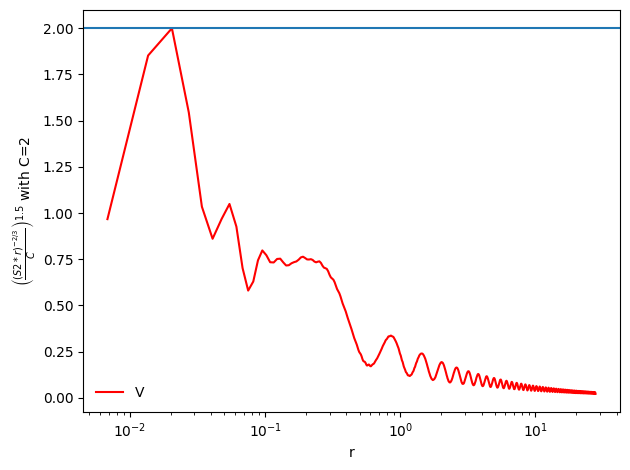

In [47]:
#ex de jeu de donnÃ©ees statistiques:
eta = 1.
plt.semilogx(r[1:]/eta, (epsilon_structure_cobra*r[1:])**(-2/3)*s2[1:], c='red', label='V')
plt.ylabel(r'$\left(\frac{(S2*r)^{-2/3}}{C}\right)^{1.5}$ with C=2')
plt.xlabel('r')
plt.axhline(C)
#plt.axhline(C*4/3)
plt.tight_layout()
plt.legend(edgecolor = 'white', framealpha =1, loc=3)

In [20]:
nfft = 1024
um=np.mean(u)
up=u-um
Kx = 2*np.pi*Fs/um
f_1 = np.zeros((1), dtype=np.ndarray)
SU_1 = np.zeros((1), dtype=np.ndarray)
f_1, SU_1 = signal.welch(up, Fs, nperseg =nfft, return_onesided = True, detrend=False, window = 'han')

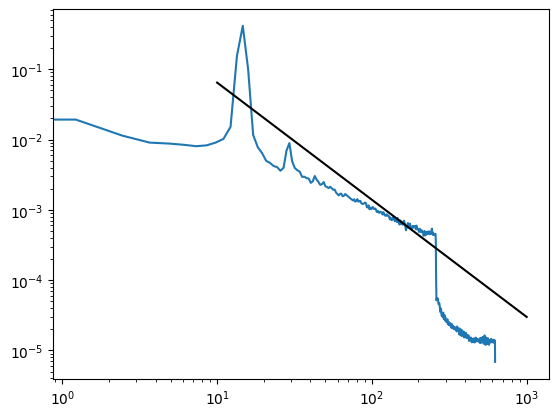

In [21]:
plt.figure()
plt.plot(f_1, SU_1)
plt.xscale('log')
plt.yscale('log')
x = np.linspace(10**(1), 10**(3), 1000)
a = 3
plt.plot(x, a*x**(-5/3), c='black')